# Example of a Verification

In this notebook, we show how to build and verify a solution for the CGSHOP 2026 challenge using the `cgshop2026_pyutils` library.

## Building the Instance

Our instance will consist of three triangulations. The points are just two points in the middle of a rectangle.

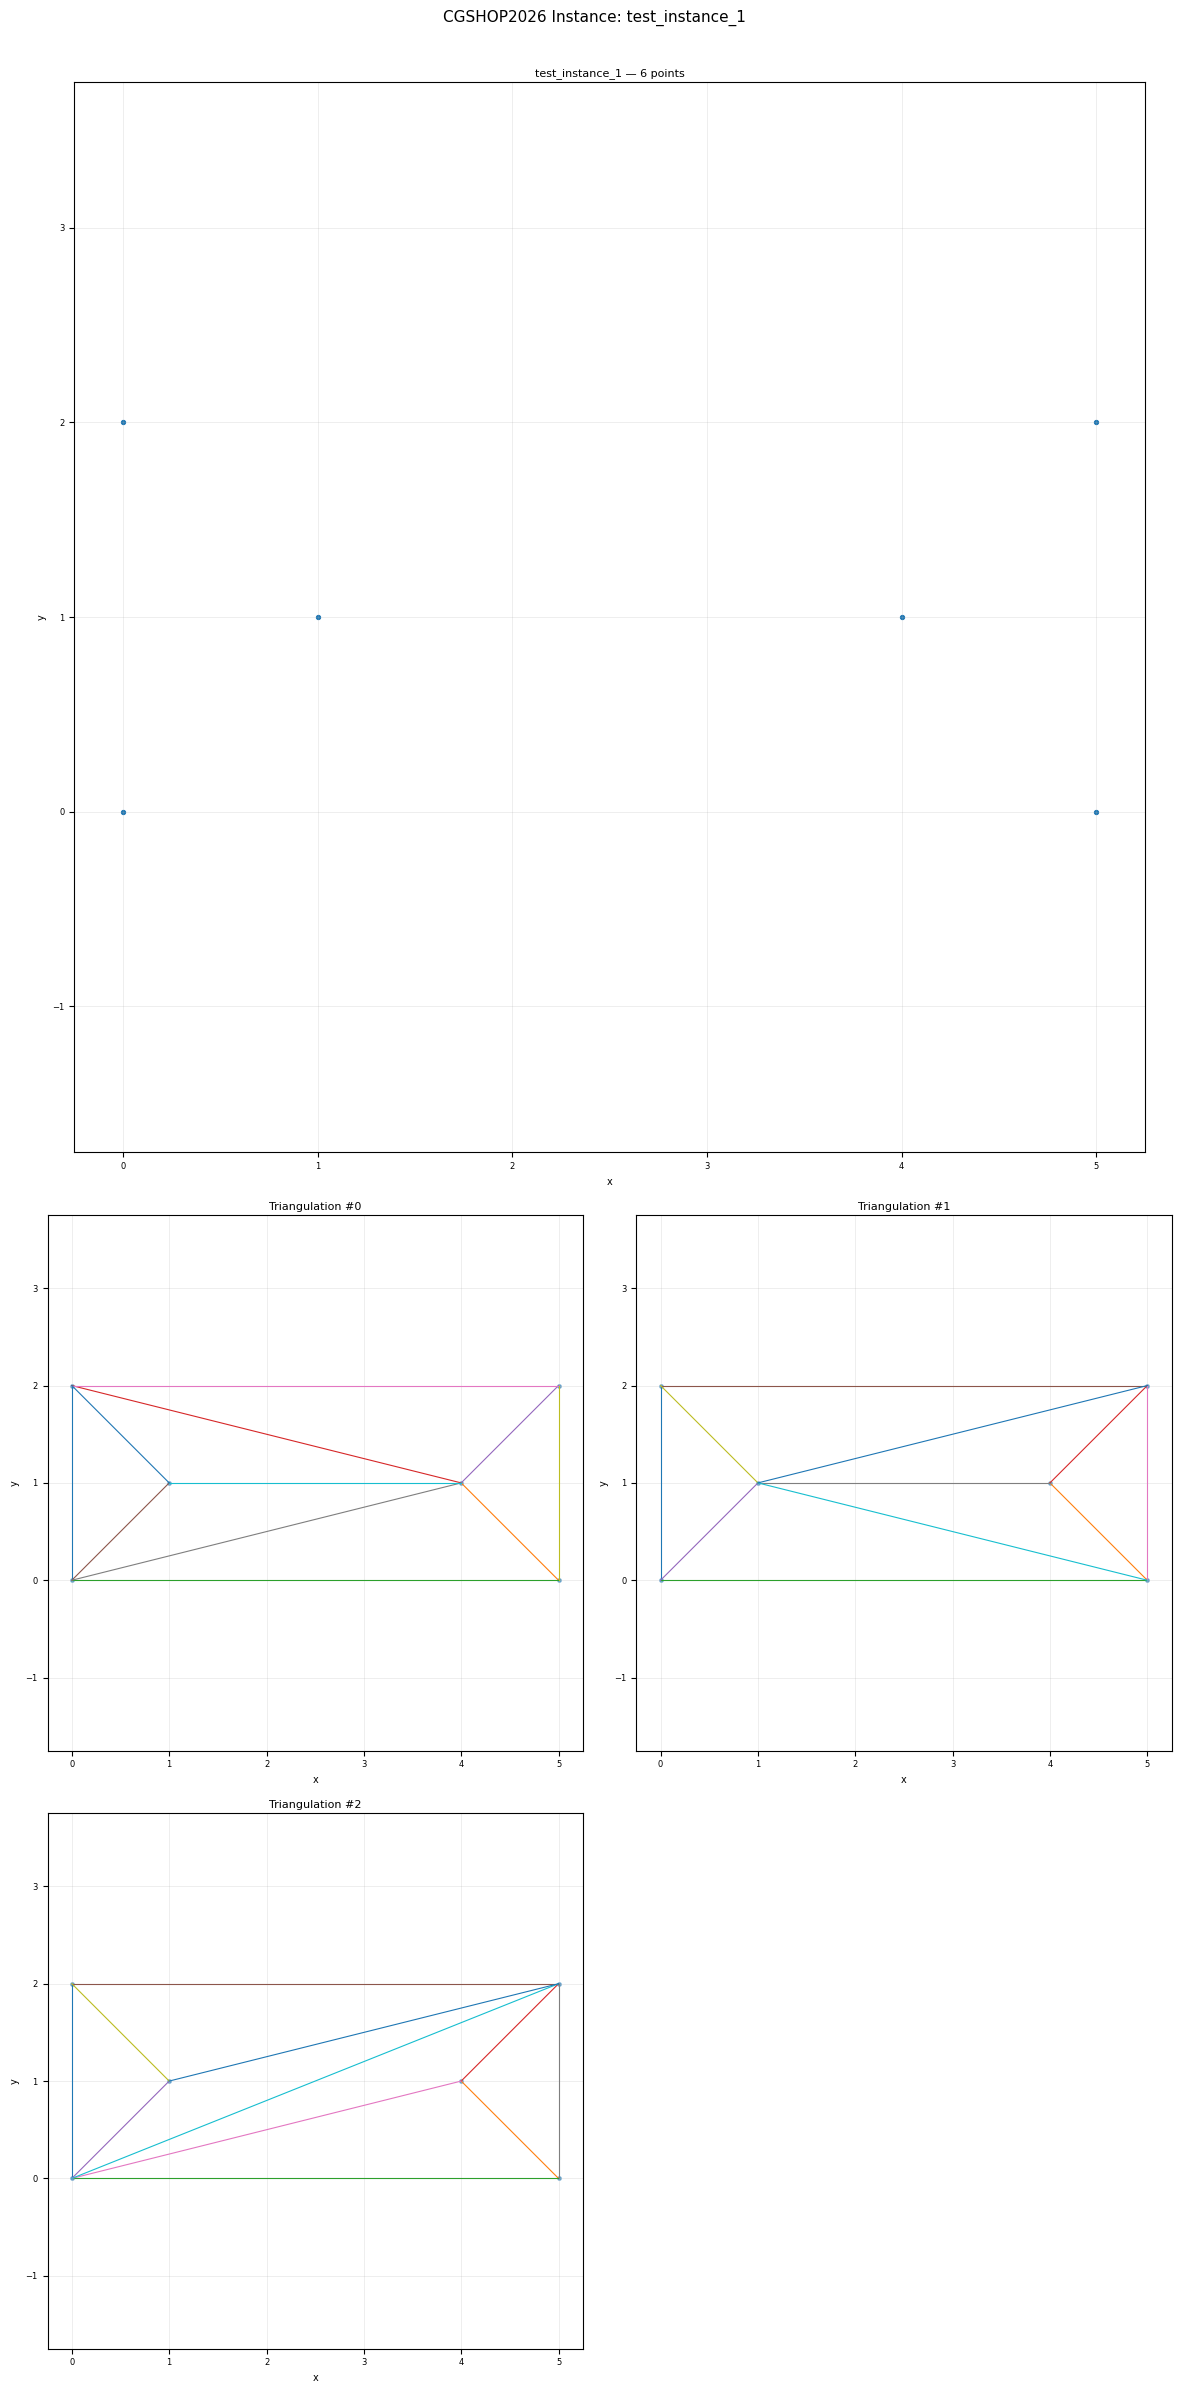

In [1]:
from matplotlib import pyplot as plt
from cgshop2026_pyutils.geometry import FlippableTriangulation, draw_flips, Point, expand_edges_by_convex_hull_edges, is_triangulation
from cgshop2026_pyutils.schemas import CGSHOP2026Instance, CGSHOP2026Solution
from cgshop2026_pyutils.verify import check_for_errors
from cgshop2026_pyutils.visualize import create_instance_plot

points = [((0,2)), (0,0), (5,0), (5,2), (4,1), (1,1)]
points_ = [Point(x, y) for x, y in points]
triang_1 =[(0,5), (0,4), (1,4), (1,5), (2,4), (3,4), (4,5)]
triang_1 = expand_edges_by_convex_hull_edges(points_, triang_1)
triang_2 = [(0,5), (1,5), (2,4), (2,5), (3,4),(3,5), (4,5)]
triang_2 = expand_edges_by_convex_hull_edges(points_, triang_2)
triang_3 = [(0,5), (1,4), (1,5), (1,3), (2,4), (3,4), (3,5)]
triang_3 = expand_edges_by_convex_hull_edges(points_, triang_3) 
instance = CGSHOP2026Instance(
    instance_uid="test_instance_1",
    points_x=[x for x, y in points],
    points_y=[y for x, y in points],
    triangulations=[triang_1, triang_2, triang_3],
)
for triang in instance.triangulations:
    points = [Point(x, y) for x, y in zip(instance.points_x, instance.points_y)]
    assert is_triangulation(points, triang, verbose=False), f"Triangulation {triang} is not valid for the given points."

create_instance_plot(instance)
plt.show()

## Triangulation 1

Let us first create a mutable triangulation from the first triangulation and visualize it.

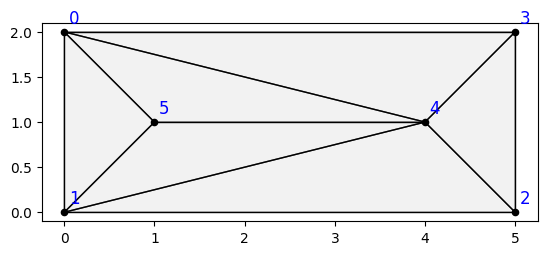

In [2]:


flippable_triang_1 = FlippableTriangulation.from_points_edges([Point(x,y) for x,y in points], triang_1)
draw_flips(flippable_triang_1, show_indices=True )


## Triangulation 2

Similarly, we can create and visualize the second triangulation.

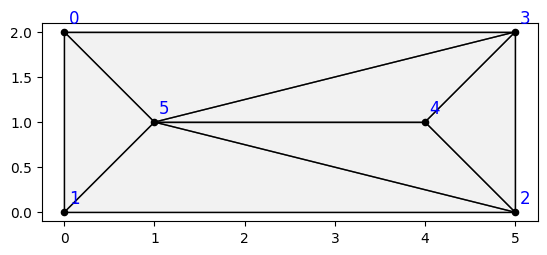

In [3]:
flippable_triang_2 = FlippableTriangulation.from_points_edges([Point(x,y) for x,y in points], triang_2)
draw_flips(flippable_triang_2,  show_indices=True)


## Triangulation 3

Finally, we create and visualize the third triangulation.

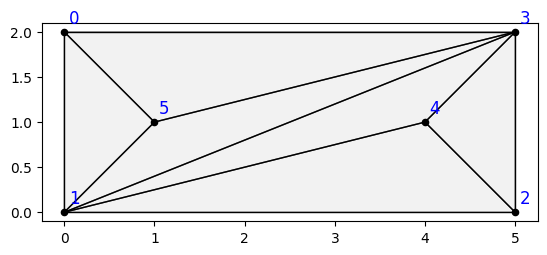

In [4]:

flippable_triang_3 = FlippableTriangulation.from_points_edges([Point(x,y) for x,y in points], triang_3)
draw_flips(flippable_triang_3, show_indices=True)

## Flipping the second Triangulation to the first Triangulation

We can flip the second triangulation to the first triangulation with one parallel flip step.

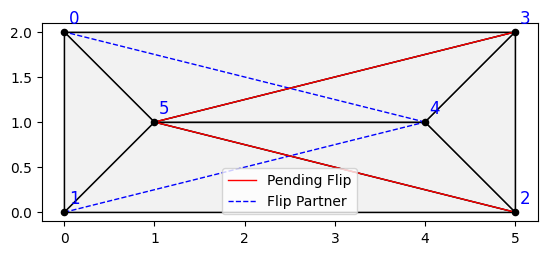

In [5]:
flippable_triang_2.add_flip((3,5))
flippable_triang_2.add_flip((2,5))
draw_flips(flippable_triang_2,  show_indices=True)
flippable_triang_2.commit()
assert flippable_triang_1 == flippable_triang_2

## Flipping the third Triangulation to the first Triangulation

We can flip the third triangulation to the first triangulation with two parallel flip steps.

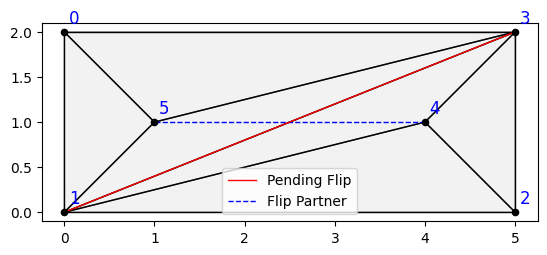

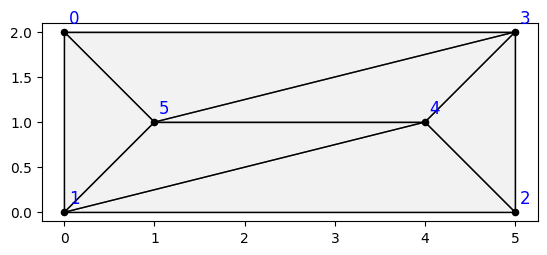

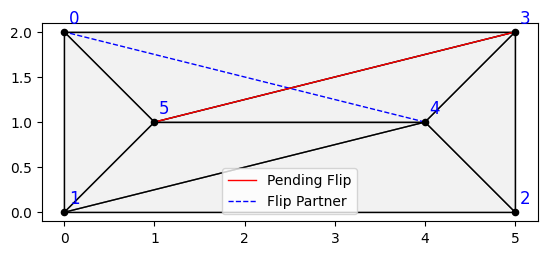

In [ ]:
flippable_triang_3.add_flip((1,3))
draw_flips(flippable_triang_3, show_indices=True)
flippable_triang_3.commit() # if you remove this line, the next flip will not be valid. Try it out!
draw_flips(flippable_triang_3, show_indices=True)
flippable_triang_3.add_flip((3,5))
draw_flips(flippable_triang_3, show_indices=True)
flippable_triang_3.commit()
assert flippable_triang_1 == flippable_triang_3

## Verify the Solution

We can now write the solution and verify that all triangulations are valid for the given points.

In [7]:
flips_1 = []
flips_2= [[(3,5), (2,5)]]
flips_3 = [[(1,3)], [(3,5)]]
solution = CGSHOP2026Solution(instance_uid="test_instance_1", flips=[flips_1, flips_2, flips_3])
errors = check_for_errors(instance, solution)
assert not errors, f"Errors found in solution: {errors}"